In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as svn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # SVM classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
df = pd.read_csv("creditcard.csv")

In [63]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [67]:
df.duplicated().sum()

0

In [69]:
df = df.drop_duplicates()

{'whiskers': [<matplotlib.lines.Line2D at 0x2a7be2579e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a7be257fb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a7be227dd0>,
 'medians': [<matplotlib.lines.Line2D at 0x2a7be2ac5c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a7be2ac830>,
 'means': []}

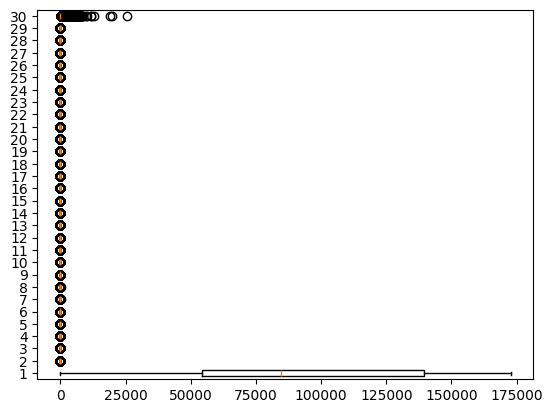

In [71]:
plt.boxplot(df.drop(["Class"], axis=1), vert= False)

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
X = df.drop('Class', axis=1)
y = df['Class']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [79]:
scaler = StandardScaler()

In [81]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
X_test

array([[-0.70776084,  0.62846035, -0.03507436, ...,  0.00334824,
         0.00256256, -0.31284623],
       [ 1.27387205, -0.10690835,  0.71666883, ...,  0.96769184,
         0.79940005, -0.35174494],
       [-1.34811061, -0.86164079,  0.85283366, ...,  0.01560762,
         0.34674777,  0.01177083],
       ...,
       [-0.44196799,  0.60372332, -0.11740337, ...,  0.02988069,
         0.07761042, -0.32244884],
       [ 0.68907303,  1.05584343,  0.08623043, ..., -0.16707329,
        -0.13668677, -0.35601729],
       [-1.76535189,  0.63786439,  0.04036693, ..., -0.21956371,
         0.02075116, -0.29473961]])

In [85]:
X_train

array([[ 1.04549909,  1.14719836, -1.04203246, ...,  0.09278213,
        -0.15619266, -0.22943372],
       [-0.29869002, -0.67791131,  0.99194846, ..., -0.04986389,
         0.15383143, -0.33119698],
       [ 0.67839667,  0.97765362,  0.0162054 , ...,  0.11132947,
        -0.16581986, -0.29880852],
       ...,
       [ 1.19385202, -0.45214212,  0.70655379, ..., -0.62638332,
         0.28835592, -0.20908921],
       [-0.95824459,  0.63781446,  0.21468286, ...,  0.10812079,
         0.09533138, -0.3392941 ],
       [-0.89610272,  0.52361687, -0.13216317, ...,  0.1416972 ,
        -0.0070969 , -0.30955042]])

In [86]:
from sklearn.svm import SVC

In [87]:
svm_model = SVC(kernel = 'rbf')
svm_model.fit(X_train, y_train)

SVC()

In [88]:
y_pred= svm_model.predict(X_test)

In [90]:
accuracy_score(y_test, y_pred)

0.9992774821132767